In [1]:
####################
####################
##  
## Astronomical Source Detection Project (Hubble)
## 12/09/2021
## Fili, Tali, Javier, Aaakhash
##
## This code will identify the astronomical objects in a provided image. 
## This code will histogram the fluxes of those objects. 
##
## Software Requirements: 
## sep: source extraction and photometry library 
## numpy: scientific computing package offering mathematical functions for multidimensional arrays
## fits from astropy.io: package used in astronomy to store images or tabulated data
## matplotlib.pyplot: data visualization and graphical plotting library 
## 
## Process Flow: 
## 1. import the packages we need 
## 2. read the image into a 2D array 
## 3. get a good quality image to perform analysis 
## 4. remove the background noise from the image 
## 5. use the new image to identify the astronomical objects 
## 6. find the flux and histogram both with and without AB Magnitude 
##
####################
####################

## Import the packages we need

In [2]:
## import numpy package as np
## import sep package as sep 

import numpy as np  
import sep 

In [3]:
## import fits package from astropy.io 
## import matplotlib.pyplot package as plt
## import rcParams from matplotlib library 

from astropy.io import fits 
import matplotlib.pyplot as plt 
from matplotlib import rcParams 

## display the matplotlib figures inline (figures displayed below cell and stored in notebook)
%matplotlib inline 

## set the default size for the figures in the notebook to [10, 8]
rcParams['figure.figsize'] = [10., 8.] 

## Read the HDU (lazy-read) of the image 

In [4]:
## opens the header data unit (highest level component of fits; includes a header and a data array or table)

fname = "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"#rename the hubble image 
hdu_list = fits.open(fname) 
hdu_list.info() #summarizes content of the opened fits file

Filename: hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   


## Get the data from the image

In [5]:
## get the ndarray (n-dimensional array) data from fname 

image_data = fits.getdata(fname) #gets ndarray from the image 
print(type(image_data)) #confirm it is an n-dimensional array
print(image_data.shape) #confirm it is a 2D array

<class 'numpy.ndarray'>
(3600, 3600)


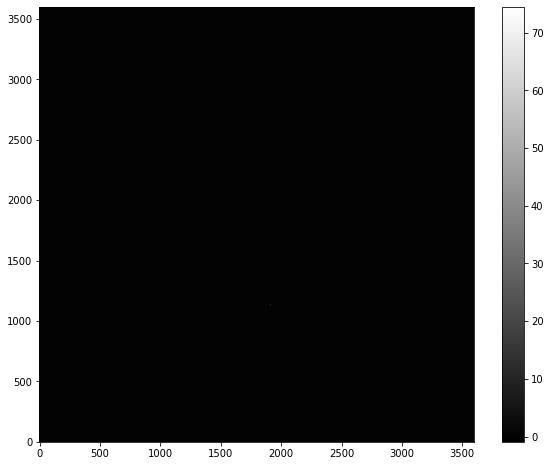

In [6]:
## plot the image using grayscale & set origin to lower left hand corner

plt.imshow(image_data, cmap='gray', origin = 'lower') 
plt.colorbar() #shows the color bar on the right hand side of the image.

## Get additional data for fun!

In [7]:
## print the minimum, maximum, mean, and standard deviation of the values in the data arrray 

print('Min:', np.min(image_data)) #prints the minimum value in the data array 
print('Max:', np.max(image_data)) #prints the maximum value in the data array 
print('Mean:', np.mean(image_data)) #prints the mean value in the data array 
print('Stdev:', np.std(image_data)) #prints the standard deviation of the values in the data array 

Min: -0.9047293
Max: 74.44648
Mean: 0.00079129904
Stdev: 0.054868452


## Use logNorm to get a better quality image

In [8]:
## import LogNorm from matplotlib.colors 
## LogNorm normalizes a given value to a range of 0 to 1 on a logarithmic scale

from matplotlib.colors import LogNorm 

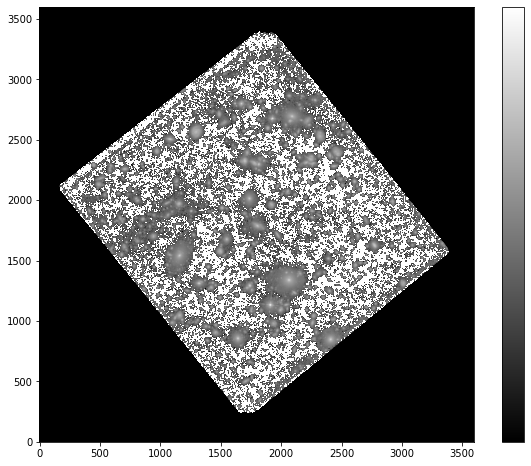

In [9]:
## plot the image using LogNorm and save the image locally 

## use grayscale and set orgin to lower left hand corner
plt.imshow(image_data, cmap='gray', norm=LogNorm(), origin = 'lower') 

## set colobar ticks at 5k, 10k, and 20k 
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4]) 
cbar.ax.set_yticklabels(['5,000', '10,000','20,000']) 

## save figure locally as a PNG file 
plt.savefig('fig1.png',bbox_inches='tight', dpi=300) #set bbox to "tight" to compute best-fit without white space 

## Get the background data, error, and subtract from image

In [10]:
## define bkg (background) as a 2D array of the image background data  
new_data = image_data.byteswap(inplace=True).newbyteorder()
bkg = sep.Background(new_data) 

In [11]:
## print the global mean and global noise of the image background 

print(bkg.globalback)
print(bkg.globalrms) 

0.0
0.0005398219218477607


In [12]:
## define bkg_image as the 2D array of background data for later use

bkg_image = bkg.back()

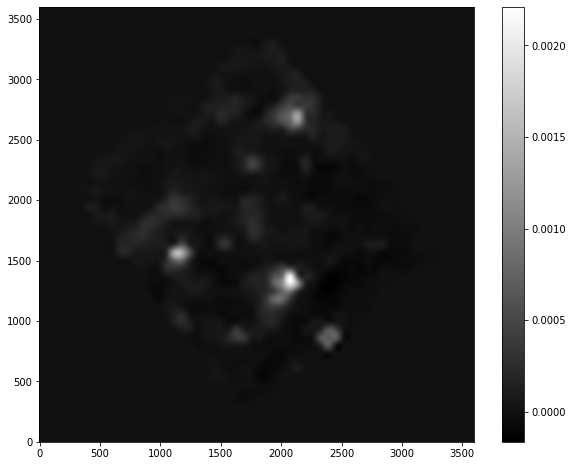

In [13]:
## plot the background image data and save it locally

## interpolation is a technique to estimate unknown data points btwn known data points
## plot the image in grayscale, set origin to lower left hand corner 
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower') #set interpolation to nearest for best resolution of this image

plt.colorbar(); #displays the color bar

## save figure locally as PNG
plt.savefig('fig2hubble.png',bbox_inches='tight', dpi=300) #set bbox to "tight" to compute best-fit without white space 

In [14]:
## define bkg_rms (background root mean square) as the 2D array of background rms for later use

bkg_rms = bkg.rms() 

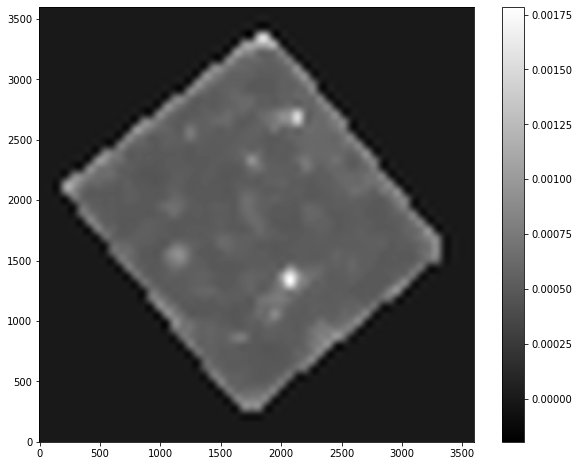

In [15]:
## plot the background rms image data and save it locally 

## interpolation is a technique to estimate unknown data points btwn known data points
## plot the image in grayscale, set origin to lower left hand corner
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower') #set interpolation to nearest for best resolution of this image

plt.colorbar(); #displays the color bar

## save figure locally as a PNG
plt.savefig('fig3.png',bbox_inches='tight', dpi=300) #set bbox to "tight" to compute best-fit without white space 

In [16]:
## define data_sub as image data minus background data for later use

data_sub = new_data - bkg 

## Find the objects and show them in the image

In [17]:
##identify the objects in the image 

## sep.extract will identify objects in data_sub with detection threshold of 1.5*(global background RMS)
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms) 

In [18]:
## define number_of_objects as the length of the object list for later use

number_of_objects = len(objects) 
print(number_of_objects)

8640


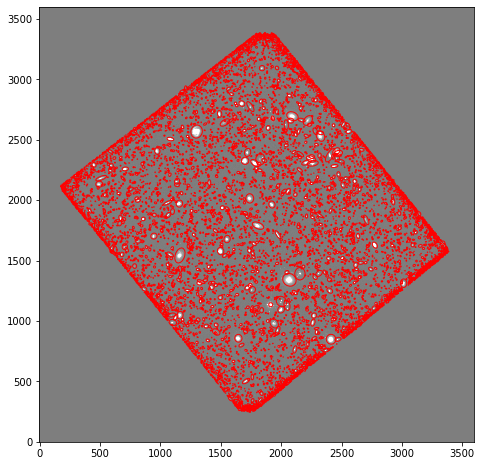

In [19]:
## Create an image of the background-subtracted data with ellipses encircling each identified object

## Ellipse is a package from matplotlib.patches used to create ellipses of varying color, shape, and size
from matplotlib.patches import Ellipse 

## plt.subplots allow a combination of multiple plots on a single figure 
fig, ax = plt.subplots() 

## np.mean returns the mean of the data, np.std returns the standard deviation 
m, s = np.mean(data_sub), np.std(data_sub) 

## interpolation is a technique to estimate unknown data points btwn known data points
## plot the image in grayscale, set origin to lower left hand corner
## vmin and vmax respectively define the minimum (corresponding to black) and maximum (corresponding to white) values of the colormap
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')


#plot one ellipse for each object 
for i in range(number_of_objects): 
    
    #set the ellipse parameters with xy at the center, width = semimajor axis, height = semiminor axis, angle in degrees anti-clockwise
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]), 
                width=6*objects['a'][i],  # multiplied by 6 as required by prof brant
                height=6*objects['b'][i], # multiplied by 6 as required by prof brant
                angle=objects['theta'][i] * 180. / np.pi) 
    e.set_facecolor('none') #ellipses will NOT be filled in
    e.set_edgecolor('red') #the color of the ellipse outline is red 
    ax.add_artist(e) #adds the ellipse subplot to the image subplot for an entire image
    
## save image locally as PNG    
plt.savefig('fig4.png',bbox_inches='tight', dpi=300) #set bbox to "tight" to compute best-fit without white space 

## Find and histogram the flux (w/o AB Mag)

In [20]:
## find the flux, flux error, and set a flag

## fluxerr is the flux error; (sigma^2)_F = sigma^2 summed over i + F/g,  
## 3.0 is 3 pixels or about 0.4 arcseconds, describing radius of aperture 
## g is the gain, the poisson uncertainty 
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0) 

In [21]:
## print the first 10 fluxes and the associated flux error 

for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i])) 

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


In [22]:
## print the flux type, maximum, and minimum values for later use 

print(type(flux)) #print the flux type 
print(flux.max()) #print the flux max value 
print(flux.min()) #print the flux min value

<class 'numpy.ndarray'>
807.2972835731507
-1.061365427845663


(0.0, 20.0)

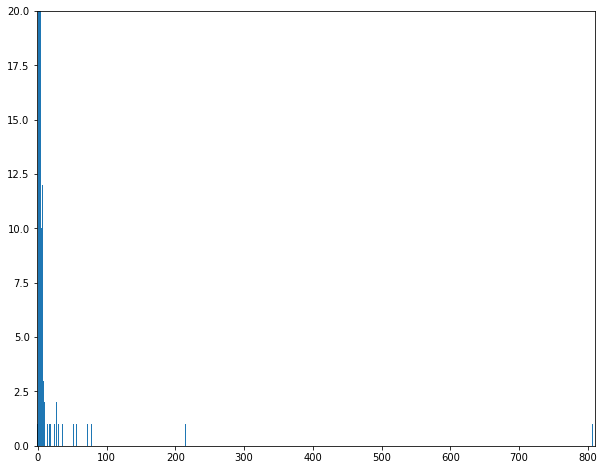

In [23]:
## histogram the flux data 

## .flatten converts a 2D array into a 1D array 
## 1000 bins will split the data into 1000 rectangles
## the x-axis shows  magnitude of the flux and y-axis shows the number of objects with similar flux 
histogram = plt.hist(flux.flatten(),bins=1000) 

plt.xlim(-2,810) #set the x limit to include -1.06 data flux data and the highest flux at 807.29. 
plt.ylim(0,20) #set the y limit to include 0 to 20

## Histogram the flux with AB Mag

In [24]:
## extract the positive values of flux for use later in log10

pflux = np.extract(flux > 0, flux) 
print (pflux) 

[0.03128197 0.03101789 0.00194706 ... 0.08851303 0.01802793 0.01398957]


In [25]:
## Find the ABMagnitude using the equation on the STSCI website 

## the zeropoint for aperture of 0.4 arcseconds (3 pixels) is 26.0974 
ABMag = 26.0974 - 2.5*np.log10(pflux) 

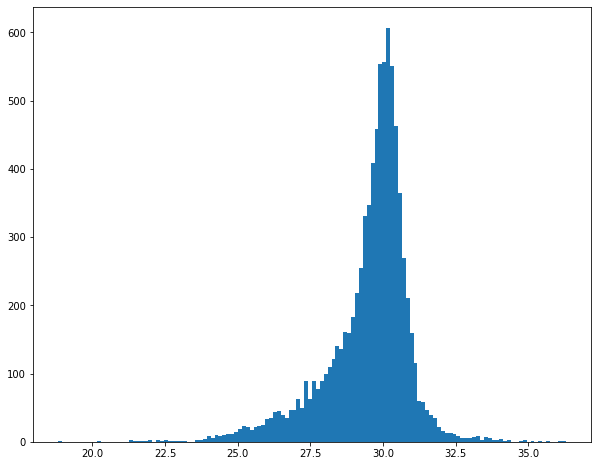

In [26]:
## histogram the ABMagnitude data 

## .flatten converts a 2D array into a 1D array 
## set bins to auto for best results 
histogram = plt.hist(ABMag.flatten(),bins='auto') 